In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\skme2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\skme2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\skme2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

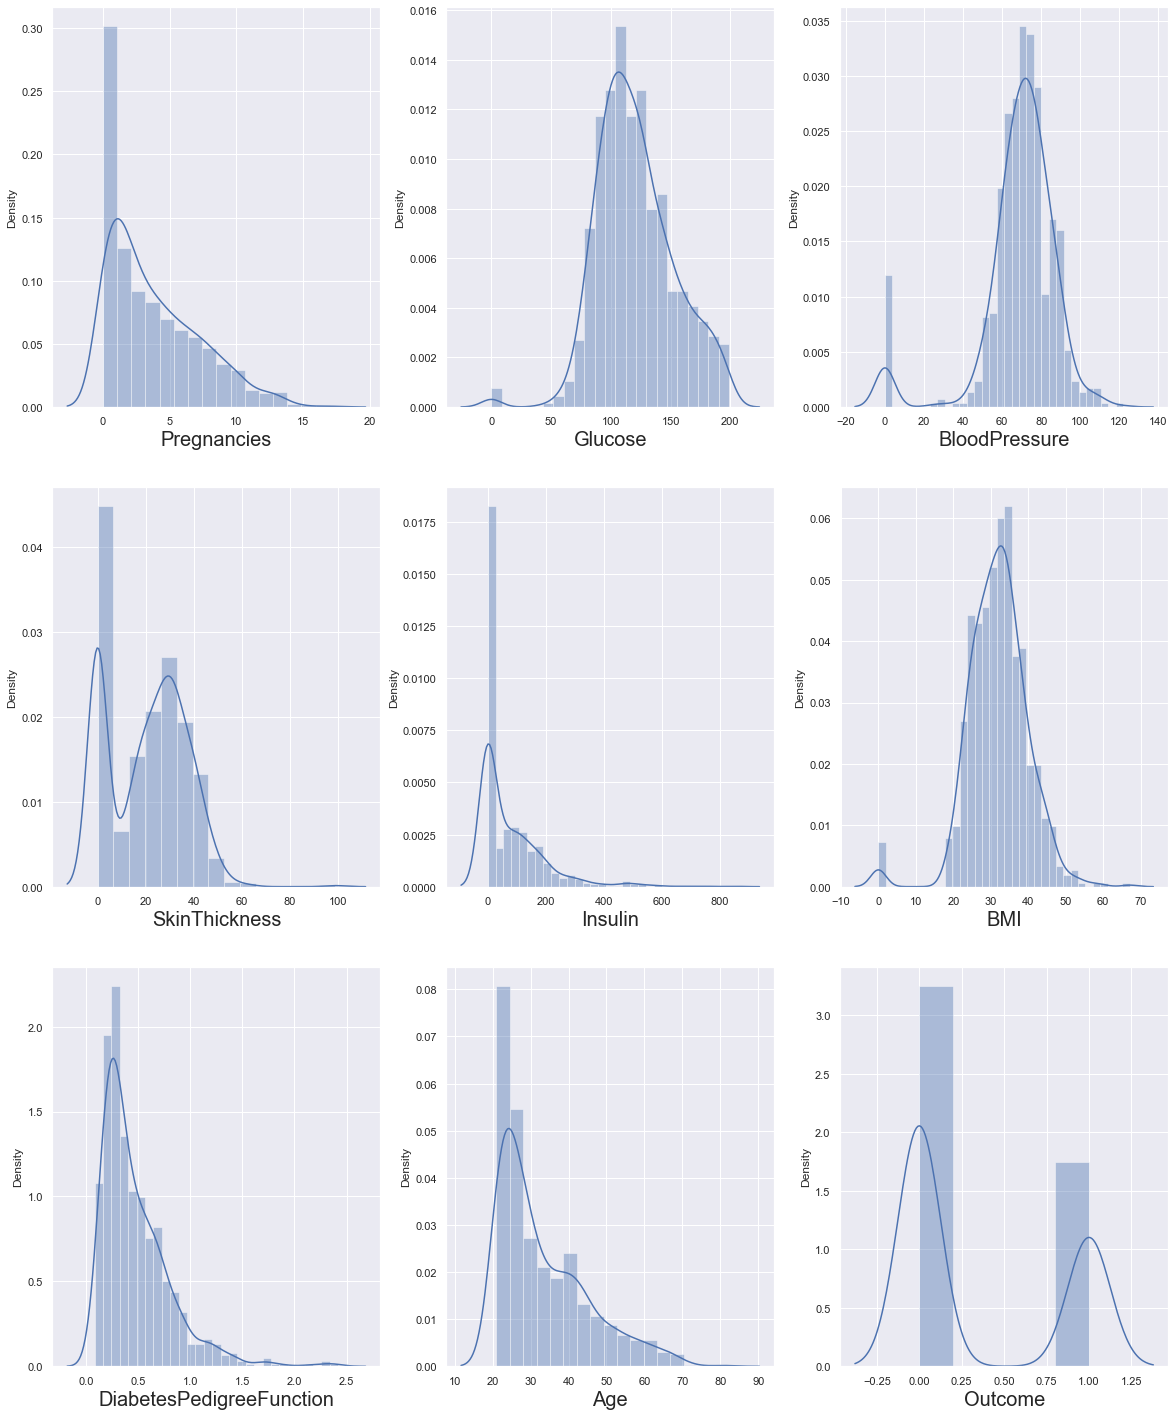

In [12]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [14]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

C:\Users\skme2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\skme2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\skme2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

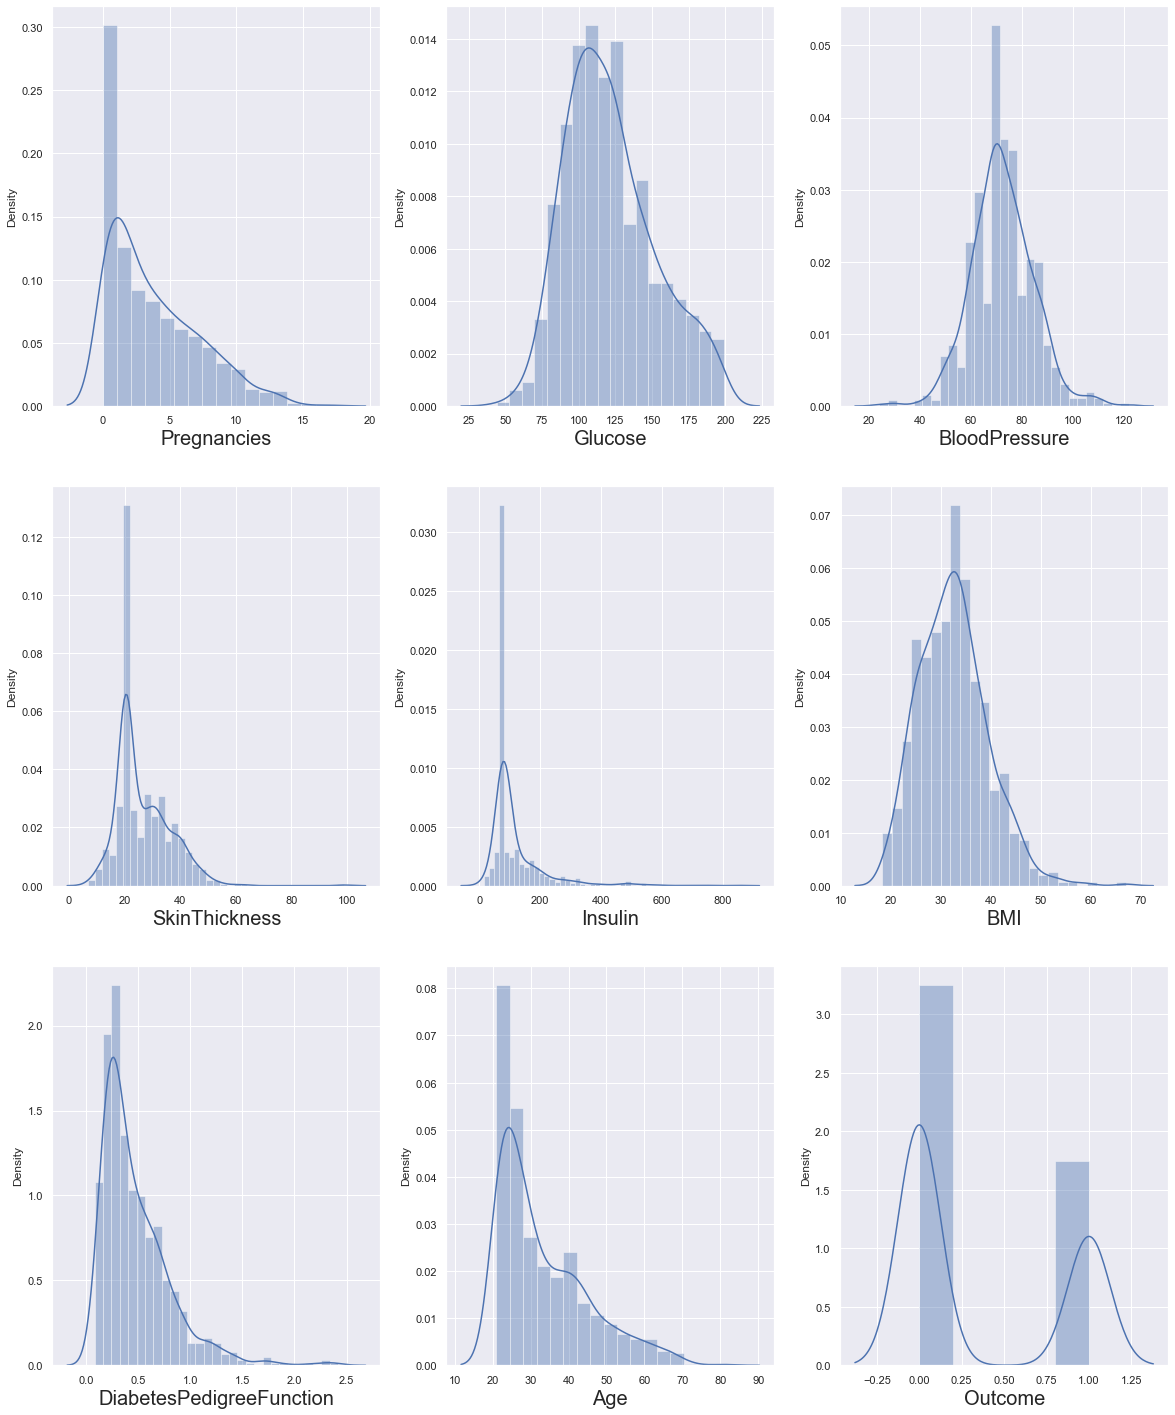

In [15]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

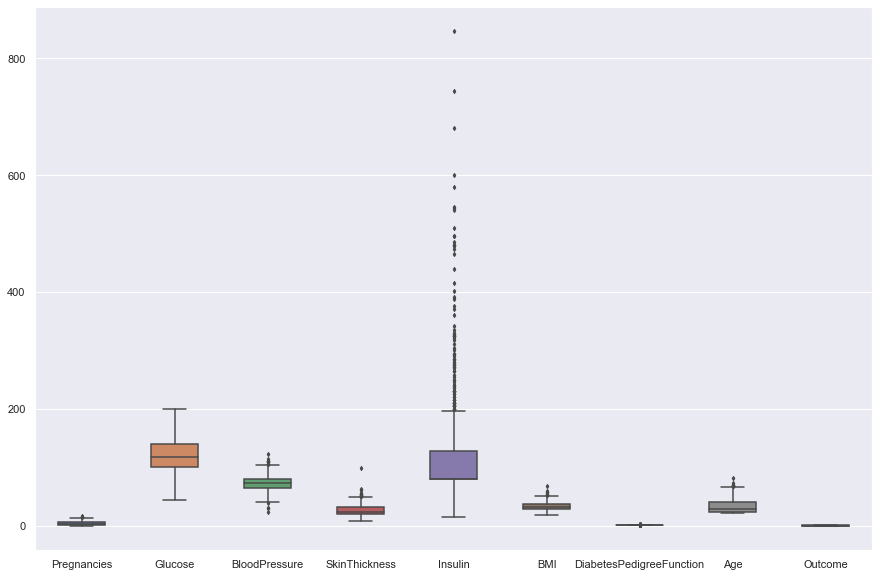

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [21]:
q = df['Pregnancies'].quantile(0.98)
# we are removing the top 2% df from the Pregnancies column
df_cleaned = df[df['Pregnancies']<q]
q = df_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% df from the BMI column
df_cleaned  = df_cleaned[df_cleaned['BMI']<q]
q = df_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% df from the SkinThickness column
df_cleaned  = df_cleaned[df_cleaned['SkinThickness']<q]
q = df_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% df from the Insulin column
df_cleaned  = df_cleaned[df_cleaned['Insulin']<q]
q = df_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% df from the DiabetesPedigreeFunction column
df_cleaned  = df_cleaned[df_cleaned['DiabetesPedigreeFunction']<q]
q = df_cleaned['Age'].quantile(0.99)
# we are removing the top 1% df from the Age column
df_cleaned  = df_cleaned[df_cleaned['Age']<q]

C:\Users\skme2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\skme2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\skme2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

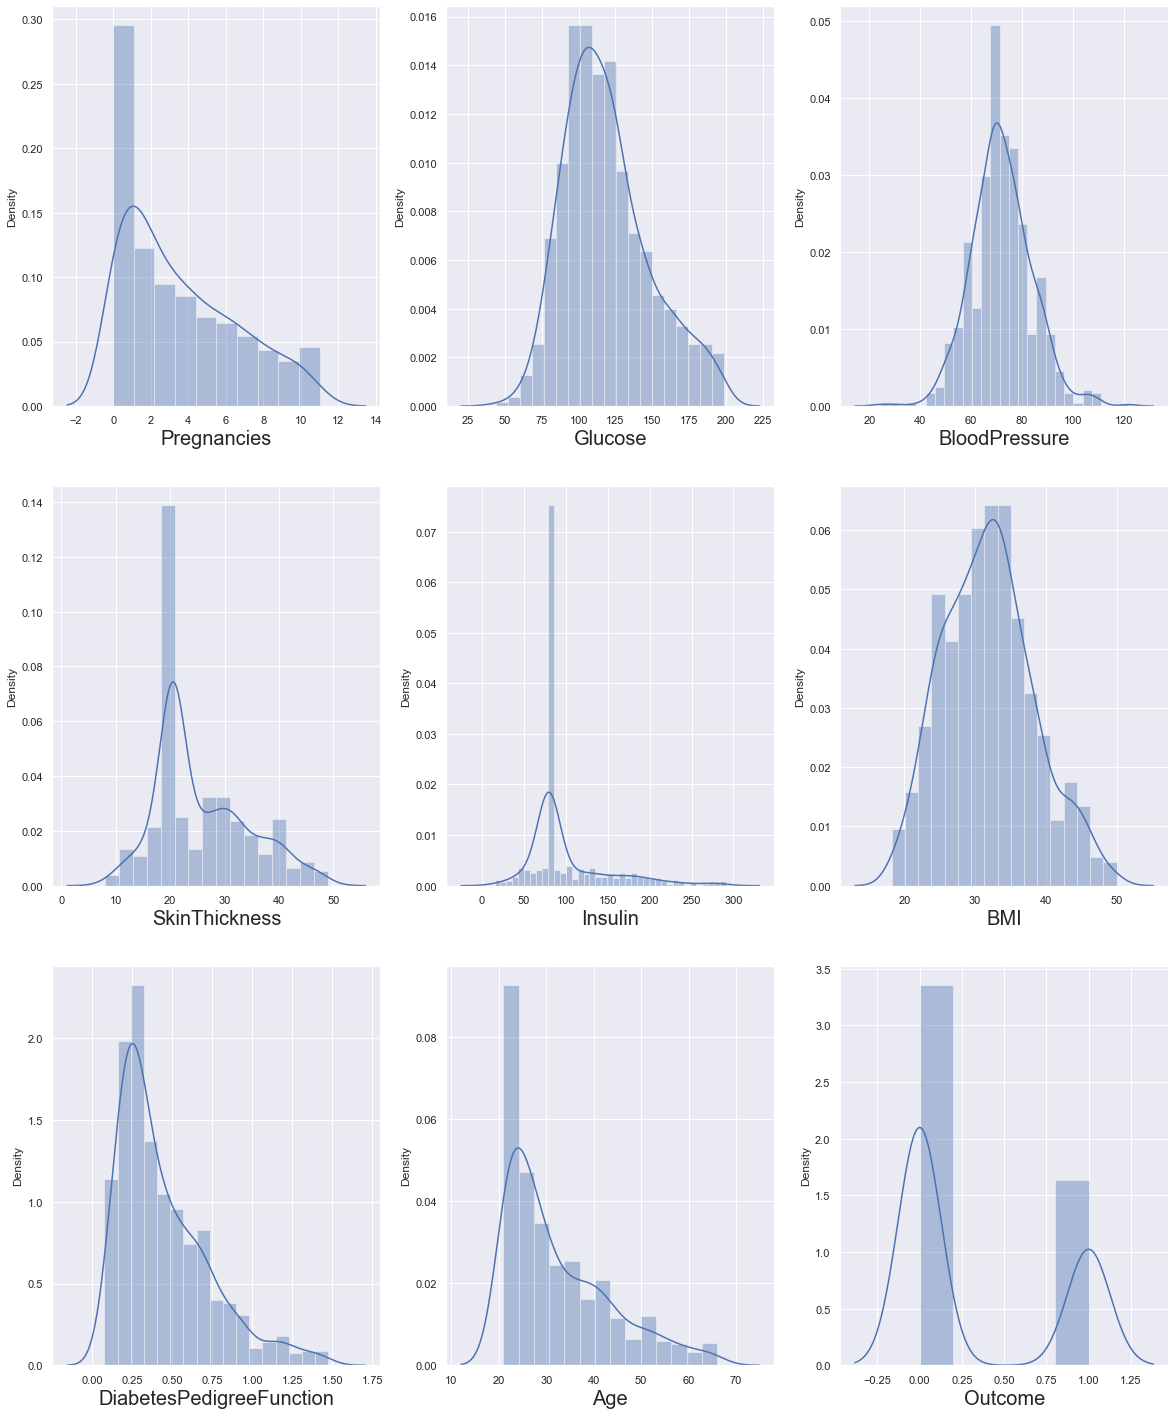

In [23]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()


In [25]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

C:\Users\skme2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\skme2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\skme2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\skme2\anacond

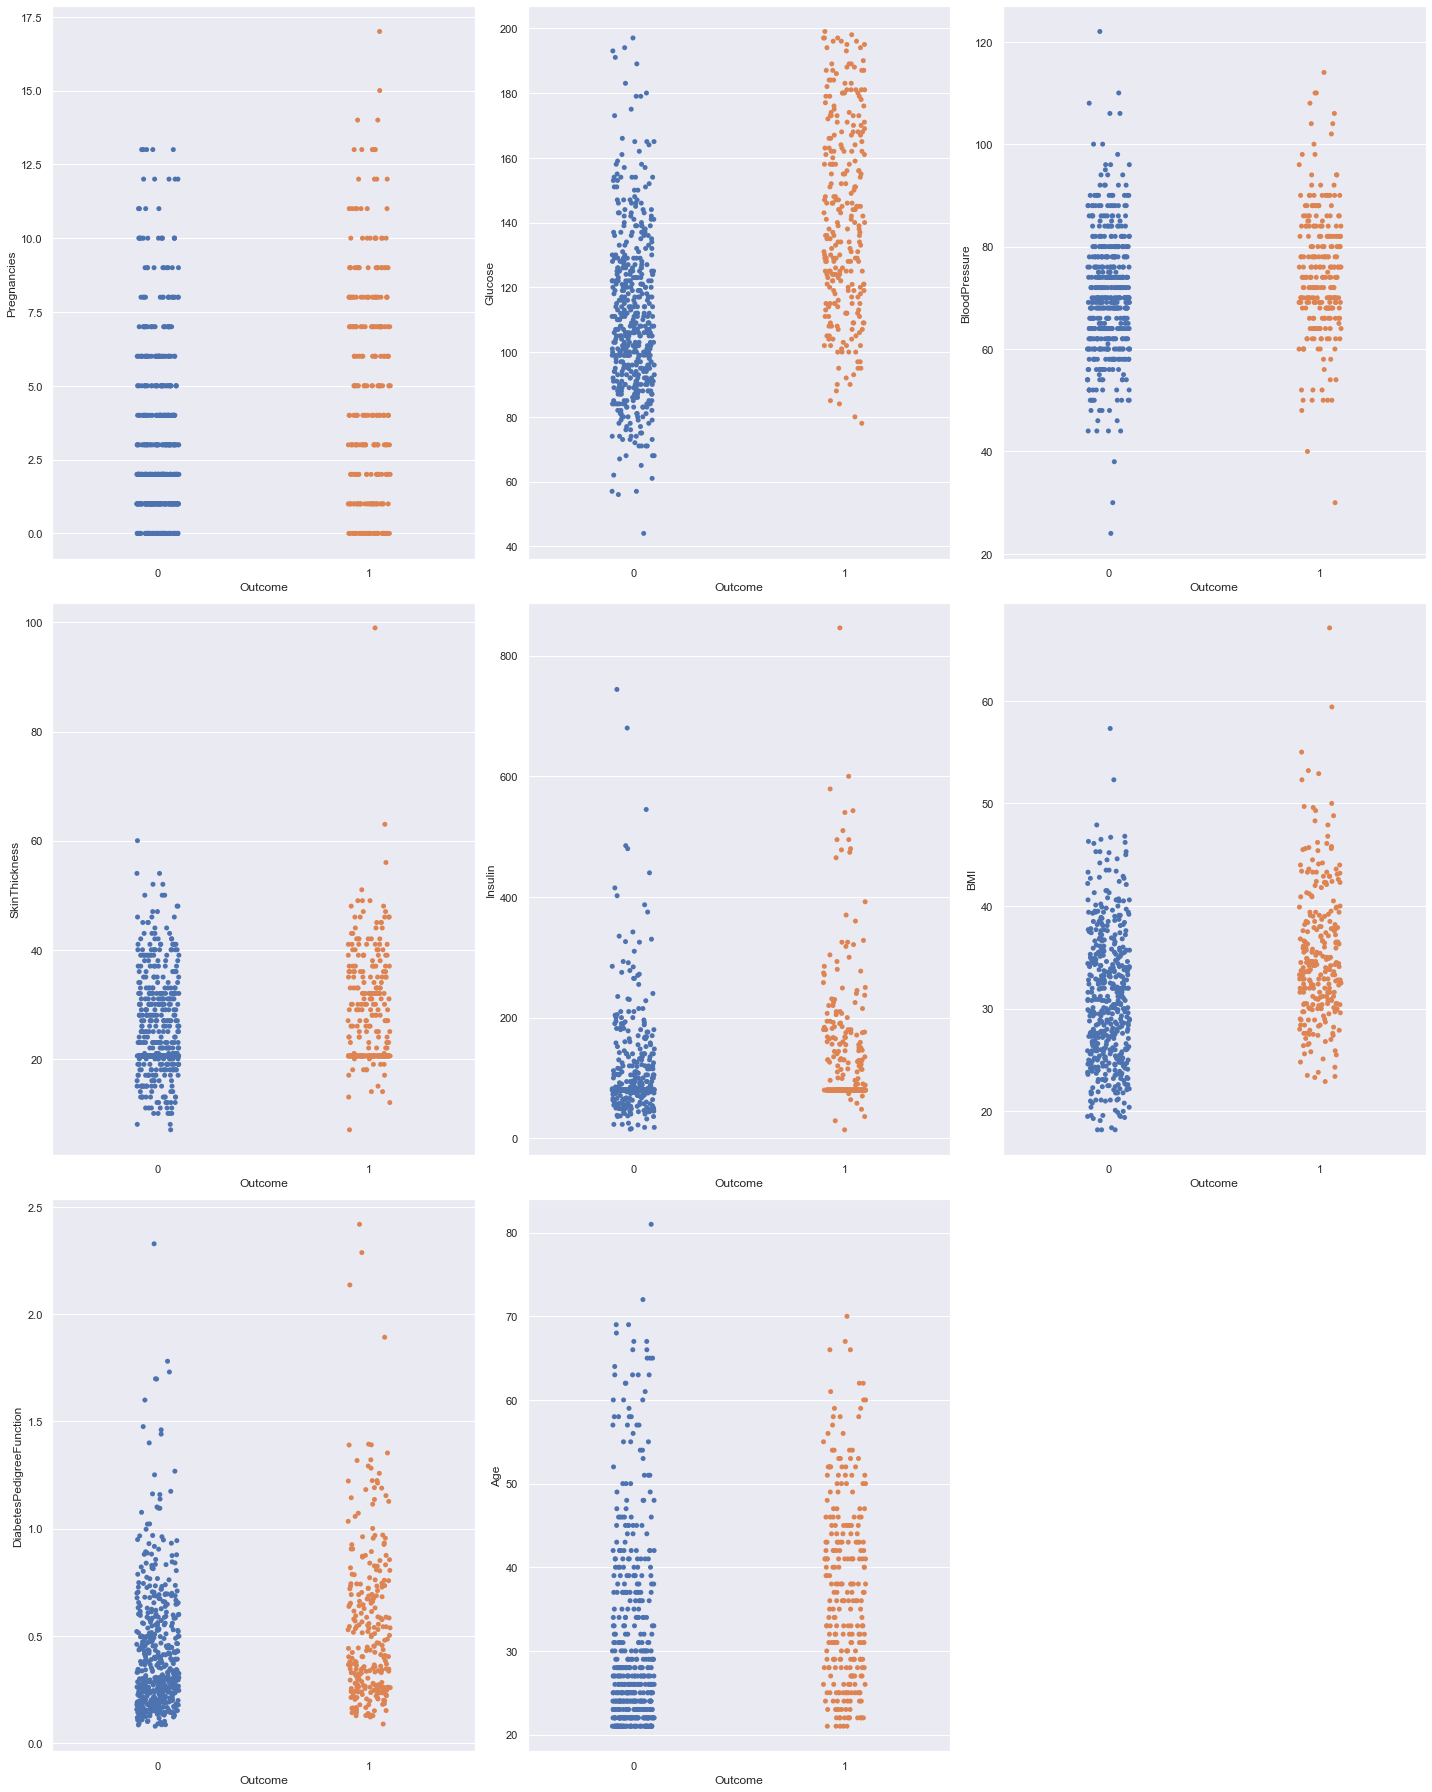

In [26]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [27]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [28]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [29]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [30]:
knn = KNeighborsClassifier()

In [31]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = knn.predict(x_test)

In [33]:
knn.score(x_train, y_train)

0.8159722222222222

In [34]:
accuracy_score(y_test, y_pred)

0.7291666666666666

In [35]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [36]:
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid, cv = 5, verbose=3)

In [37]:
gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.707 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.765 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.713 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.696 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.765 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.757 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.739 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.722 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.730 total 

[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11;, score=0.809 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11;, score=0.730 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11;, score=0.739 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11;, score=0.783 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12;, score=0.733 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12;, score=0.783 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12;, score=0.696 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12;, score=0.739 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12;, score=0.791 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=13;, score=0.733 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_s

[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=7;, score=0.757 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=7;, score=0.748 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=7;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=7;, score=0.783 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=9;, score=0.690 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=9;, score=0.809 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=9;, score=0.739 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=9;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=9;, score=0.765 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=10;, score=0.741 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n

[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=3;, score=0.707 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=3;, score=0.765 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=3;, score=0.713 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=3;, score=0.696 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=3;, score=0.765 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=5;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=5;, score=0.757 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=5;, score=0.739 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=5;, score=0.722 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=5;, score=0.730 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=7;, score=0.

[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=10;, score=0.741 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=10;, score=0.817 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=10;, score=0.722 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=10;, score=0.739 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=10;, score=0.774 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11;, score=0.750 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11;, score=0.809 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11;, score=0.730 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11;, score=0.739 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11;, score=0.783 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=12

[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=5;, score=0.739 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=5;, score=0.722 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=5;, score=0.730 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=7;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=7;, score=0.757 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=7;, score=0.748 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=7;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=7;, score=0.783 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=9;, score=0.690 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=9;, score=0.809 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=9;, score=0.

[CV 2/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=0.809 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=0.739 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=0.765 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, n_neighbors=10;, score=0.741 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, n_neighbors=10;, score=0.817 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, n_neighbors=10;, score=0.722 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, n_neighbors=10;, score=0.739 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=10;, score=0.774 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, n_neighbors=11;, score=0.750 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, n_neighbors=11;, score=0.809 total time=

[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=13;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=13;, score=0.774 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=3;, score=0.707 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=3;, score=0.765 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=3;, score=0.713 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=3;, score=0.696 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=3;, score=0.765 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=5;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=5;, score=0.757 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=5;, score=0.739 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=5;, score=0.722 total time=   0.

[CV 5/5] END algorithm=brute, leaf_size=34, n_neighbors=5;, score=0.730 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=7;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=7;, score=0.757 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=34, n_neighbors=7;, score=0.748 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=34, n_neighbors=7;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=34, n_neighbors=7;, score=0.783 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=9;, score=0.690 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=9;, score=0.809 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=34, n_neighbors=9;, score=0.739 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=34, n_neighbors=9;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=34, n_neighbors=9;, score=0.765 total time=   0.0s

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [38]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 11}

In [ ]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)

In [40]:
knn_hyper = KNeighborsClassifier(n_neighbors=11, algorithm='ball_tree', leaf_size=18)

In [41]:
knn_hyper.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=11)

In [42]:
knn_hyper.score(x_train, y_train)

0.796875

In [43]:
knn_hyper.score(x_test, y_test)

0.7708333333333334

In [46]:
kfold = KFold(n_splits=12,random_state= 42, shuffle=True)
kfold.get_n_splits(X_scaled)

12

In [52]:
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.7982954545454546 and test score is :   0.6875
for k =  2
train_score is :   0.7855113636363636 and test score is :   0.84375
for k =  3
train_score is :   0.8011363636363636 and test score is :   0.703125
for k =  4
train_score is :   0.8039772727272727 and test score is :   0.75
for k =  5
train_score is :   0.7883522727272727 and test score is :   0.84375
for k =  6
train_score is :   0.8068181818181818 and test score is :   0.734375
for k =  7
train_score is :   0.7911931818181818 and test score is :   0.765625
for k =  8
train_score is :   0.8068181818181818 and test score is :   0.65625
for k =  9
train_score is :   0.7940340909090909 and test score is :   0.828125
for k =  10
train_score is :   0.8025568181818182 and test score is :   0.75
for k =  11
train_score is :   0.7897727272727273 and test score is :   0.75
for k =  12
train_score is :   0.796875 and test score is :   0.71875
************************************************
****************

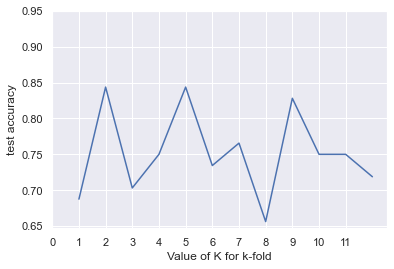

In [54]:
plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05)) 
plt.show()

In [55]:
import pickle

with open('modelForPrediction258.sav', 'wb') as f:
    pickle.dump(knn,f)
    
with open('standardScalar369.sav', 'wb') as f:
    pickle.dump(scalar,f)